# Dynamic Programming

Dynamic Programming ermöglicht es Probleme in Laufzeiten, wie $\mathcal{O}(n^2)$ oder $\mathcal{O}(n^3)$, zu lösen, für die sonst exponentieller Aufwand nötig wäre. Das Wort _Programming_ steht hier für Optimierung (ähnlich wie bei Linear Programming). Das Wort Optimierung ist zutreffend, da mit Dynamic Porgamming Optimierungsprobleme gelöst werden können, also Probleme, bei denen ein Minimum bzw. Maximum gefunden werden soll.

Das Ziel dabei ist, ein großes Gesamtproblem in kleinere Subprobleme zu teilen und die Lösung der Subprobleme zu speichern. Anders formuliert tut man so, als hätte man die Lösung für ein Subproblem und nutzt dieses um ein nächst größeres Problem zu lösen. Es lässt sich also sagen: Dynamic Programming = Recursion + Guessing. Ein entscheidender Unterschied zu Divide and Conquer, wo auch Probleme in kleinere Teilprobleme geteilt werden, ist, dass die Teilprobleme sich überlappen. Dies macht es möglich, durch das Speichern der Lösungen einen sehr großen Gewinn bezüglich des Rechenaufwands zu erzielen.

Grundlegende Eigenschaften:

 - Das große Problem wird in Teilprobleme geteilt
 - Die optimale Lösung des Teilproblems wird genutzt um die optimale Lösung des größeren Problems zu finden
 - Die Optimalitätsbedingung (Principle of Optimality) muss gelten, d.h. die optimale Lösung des Gesamtproblems muss sich zwangsläufig aus den optimalen Lösungen der Teilprobleme ergeben
 - Trade space for time - es wird zusätzlicher Speicherplatz investiert, um den Algorithmus deutlich zu beschleunigen


## Fibonacci

Ein Beispiel, für welches Dynamic Programming benutzt werden kann, sind die Fibonacci Zahlen. Es ist relativ einfach die Bildungsvorschrift anzugeben:

$$
fib(n) = \begin{cases}
    0, & \text{wenn $n=0$}. \\
    1, & \text{wenn $n=1$}. \\
    fib(n-1) + fib(n-2) & \text{sonst}.
\end{cases}
$$

Dies lässt sich auch schnell programmieren:

In [1]:
def fib_naive(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib_naive(n-1) + fib_naive(n-2)

print(list(map(fib_naive, list(range(1, 15)))))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


### Rekursionbaum

In [2]:
import svgwrite

fib_tree_svg = svgwrite.Drawing('img/fib_tree.svg', profile='tiny')

phi = (1 + 5 ** 0.5) / 2

def fib_tree(n, x, y):
    if n == 0:
        fib_tree_svg.add(fib_tree_svg.text('fib(0)', insert=(x, y)))
    elif n == 1:
        fib_tree_svg.add(fib_tree_svg.text('fib(1)', insert=(x, y)))
    else:
        fib_tree_svg.add(fib_tree_svg.text(f'fib({n})', insert=(x, y)))
        fib_tree_svg.add(fib_tree_svg.line((x, y+8), (x+10-phi**n*7, y+25), stroke=svgwrite.rgb(10, 10, 16, '%')))
        fib_tree_svg.add(fib_tree_svg.line((x+20, y+8), (x+10+phi**n*7, y+25), stroke=svgwrite.rgb(10, 10, 16, '%')))
        fib_tree(n-1, x-phi**n*7, y+40)
        fib_tree(n-2, x+phi**n*7, y+40)

fib_tree(7, 550, 30)
fib_tree_svg.save()

<img src="img/fib_tree.svg" width="1000" height="900">

### Nutzung von Dynamic Programming

Analysiert man die Zeitkomplexität des oben beschriebenen Algorithmus, so muss man festellen, dass es sich um einen exponentiellen Aufwand handelt (genau $\Theta(\phi^n)$); und das für ein Problem, das nicht sehr komplex zu sein scheint. Jedoch kann Dynamic Programming genutzt werden, um die Fibonacci Zahlen wesentlich schneller zu berechnen.

Die Grundidee besteht darin, jeden Wert nur einmal ausrechnen zu müssen. Wurde einmal der Wert einer Fibonacci Zahl berechnet, so wird er in einem Zwischenspeicher abgelegt und steht nun zur Verfügung, sobald dieser Wert wieder benötigt wird. Hierfür sollte eine Datenstruktur gewählt werden, mit der man in $\mathcal{O}(1)$ einen Wert in Abhängigkeit vom Key lesen kann. Hier bietet es sich an eine Hashmap, die vom Parameter $n$ auf $fib(n)$ abbildet, oder ein Array, bei dem die $n$-te Fibonacci Zahl am Index $n$ steht, zu nutzen.

In [3]:
dic = {}

def fib(n):
    if n in dic:
        return dic[n]
    if n == 0:
        f = 0
    elif n == 1:
        f = 1
    else:
        f = fib(n-1) + fib(n-2)
    dic[n] = f
    return f

print(list(map(fib, list(range(1, 15)))))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


Bei der oben beschriebenen Variante handelt es sich um die Top-Down Version des Dynamic Programming-Ansatzes. Man spricht hier von Top-Down, da man zunächst versucht die Wurzel des Rekursionsbaums zu berechnen, dafür dann aber schrittweise den Baum runter in Richtung Blätter gehen muss, um die Fibonacci-Zahlen ausrechnen zu können.

In [4]:
fib_tree_dp_svg = svgwrite.Drawing('img/fib_tree_dp.svg', profile='tiny')

phi = (1 + 5 ** 0.5) / 2

def fib_tree_dp(n, x, y):
    if n == 0:
        fib_tree_dp_svg.add(fib_tree_svg.text('fib(0)', insert=(x, y)))
    elif n == 1:
        fib_tree_dp_svg.add(fib_tree_svg.text('fib(1)', insert=(x, y)))
    else:
        fib_tree_dp_svg.add(fib_tree_svg.text(f'fib({n})', insert=(x, y)))
        fib_tree_dp_svg.add(fib_tree_svg.line((x, y+8), (x-28, y+25), stroke=svgwrite.rgb(10, 10, 16, '%')))
        fib_tree_dp_svg.add(fib_tree_svg.line((x+20, y+8), (x+50, y+25), stroke=svgwrite.rgb(10, 10, 16, '%')))
        fib_tree_dp_svg.add(fib_tree_svg.text(f'fib({n-2})', insert=(x+40, y+40)))
        fib_tree_dp(n-1, x-40, y+40)

fib_tree_dp(6, 250, 30)
fib_tree_dp_svg.save()

<img src="img/fib_tree_dp.svg" width="1000" height="900">

Der Rekursionbaum zeigt, dass die Werte für $n-2$ nicht rekursiv zerlegt werden müssen, sondern bereits vorliegen. Dadurch wächst der Rekursionsbaum nich exponentiell, sondern lienar.

Die Alternative ist es, einen Bottom-Up Algorithmus zu entwerfen, also einen Algorithmus, der bei einem Blatt des Rekursionsbaum anfängt und schrittweise die nächstgrößeren Werte berechnet. Bei den Fibonacci Zahlen ist der Bottom-Up Ansatz relativ intuitiv. Ausgehend von den bereits gegebenen Werten von $fib(0)=0$ und $fib(1)=1$ berechnet man in einer Schleife von 2 bis $n$ schrittweise den nächstgrößeren Wert. Da zur Berechnung einer Fibonacci Zahl, die zwei nächstkleineren Fibonacci Zahlen benötigt werden, ist sichergestellt, dass die nötigen Werte bereits vorliegen, da man in der Schleife von klein bis groß geht.

In [5]:
def fib_bottom_up(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    n_minus_2 = 0
    n_minus_1 = 1
    for i in range(2, n+1):
        f = n_minus_1 + n_minus_2
        n_minus_2 = n_minus_1
        n_minus_1 = f
    return f

print(list(map(fib_bottom_up, list(range(1, 15)))))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


In beiden Fällen müssen $n$ Fibonacci Zahlen berechnet werden, deren Zeitaufwand lediglich bei $\mathcal{O}(1)$ liegt, da die Werte entweder schon vorliegen, bzw. sie beim Top-Down Ansatz vorliegen, sobald die Blätter des Rekursionsbaum erreicht sind. Somit ergibt sich insgesamt ein Zeitaufwand von $\mathcal{O}(n) \cdot \mathcal{O}(1) = \mathcal{O}(n)$.

## Lösen des 0/1 Rucksack-Problems durch Dynamic Programming

Um das 0/1 Rucksack Problem zu lösen kann Dynamic Programming benutzt werden. Die folgende rekursive Gleichung kann aufgestellt werden, während $i$ der letzte Gegenstand in der Gegenstandsliste ist und $K$ die maximale Kapazität (das maximale Gewicht), welcher der Rucksack tragen kann, ist.

$$value(i,k)=\begin{cases}
    0, & \text{wenn $i=0$}.\\
    value(i-1,k), & \text{wenn $i>0 \land w[i]>k$}.\\
    max(value(i-1,k), value(i-1,k-w[i]) + v[i]), & \text{sonst}.
  \end{cases}$$
  
Betrachtet man die Gegenstandsliste bis zum 0. Gegenstand, so ist der Wert, der vom Rucksack getragen werden kann, 0, da keine Gegenstände zur Verfügung stehen. Wenn ein Gegenstand verfügbar ist, aber nicht in den Rucksack reinpasst, der erreichbare Wert ist gleich dem Wert des gleichen Problems ohne genau diesen Gegenstand. Dies liegt daran, dass es zwischen einem Gegenstand, der nciht reinpasst und einem Gegenstand, der gar nicht existiert, keinen Unterschied gibt. Dadurch wird das gleiche Probleme mit $i-1$ als Lösung zurückgegeben. 
Passt der Gegenstand aber in den Rucksack, so muss eine Entscheidung getroffen werden. Eine Möglichkeit ist, den Gegenstand in den Rucksack zu legen. In diesem Fall ist der Maximalwert gleich der Summe des Wertes genau diesen Gegenstands und dem erreichbaren Wert eines kleineren Rucksacks, der die Größe der verbleibenden Kapazität hat (der Platz im Restrucksack). Die andere Möglichkeit ist, diesen Gegenstand nicht in den Rucksack zu legen. In diesem Fall ist der Wert, der von der Funktion zurückgegeben wird gleich der erreichbaren Wert mit $i-1$ Gegenständen, also $value(i-1,k)$. Die $max()$ Funktion wählt die bessere der beiden Optionen.

Ohne Dynamic Programming wäre dies ein Exponentialzeit-Algorithmus. $k$ kann als Konstante betrachtet werden und $i$ als die Problemgröße. Um den Wert eines Problems mit der Größe $i$ zu berechnen, muss bis zu zwei-mal (im sonst-Fall) der Wert eines Problems der Größe $i-1$ berechnet werden. Das heißt die Zeit zur Berechnung der Lösung verdoppelt sich mit jedem Inkrement von $i$, was zu einer exponentiellen Laufzeit führt. Dank Dynamic Programming kann dies beschleunigt werden. Anstatt das gleiche Problem immer neuzuberechnen, wird die Lösung in einem Dictionary mit einem 2-Tuple der Parameter als Key gespeichert. Nun kann in vielen Fällen, der Wert aus dem Dictionary in $\mathcal{O}(1)$ gelesen werden. Da jeder Wert nur einmal berechnet werden muss, ist die Zeit, um das große Gesamtproblem zu lösen, das Produkt aus der Anzahl der Teilprobleme und der Zeit pro Problem. Die Zahl der Teilprobleme ist maximal die Anzahl der möglichen Tuples mit den Werten $(1...n,0...K)$, also $\mathcal{O}(nK)$. Die Laufzeit des Problems ist $\mathcal{O}(nK) \cdot \mathcal{O}(1) = \mathcal{O}(nK)$.

In [6]:
K = 120 #maximum capacity

items = [(13, 19), (11, 20), (17, 23), (15, 21), (16, 27), (14, 25), (18, 25), 
         (10, 18), (19, 24), (12, 17)] #list of weight, value pairs of all items

n = len(items) - 1 #index of last item

weights = []
values = []

calls = 0 #global variable to count functional calls

for item in items:
    weights.append(item[0])
    values.append(item[1])


#memoize decorator
def memoize(f):
    memo = {}
    
    def helper(i, k):
        if (i, k) not in memo:
            memo[(i, k)] = f(i, k)
        return memo[(i, k)]
    
    return helper


@memoize
def value_memo(i, k):
    global calls
    calls += 1
    
    if i < 0:
        return 0
    if weights[i] > k:
        return value_memo(i - 1, k)
    return max(value_memo(i - 1, k), value_memo(i - 1, k - weights[i]) + values[i])


def value(i, k):
    global calls
    calls += 1
    
    if i < 0:
        return 0
    if weights[i] > k:
        return value(i - 1, k)
    return max(value(i - 1, k), value(i - 1, k - weights[i]) + values[i])


print('Mit Memoization:')
print('Ergebnis: ' + str(value_memo(n, K)))
print('Funktionsaufrufe: ' + str(calls))
calls = 0
print()
print('Ohne Memoization:')
print('Ergebnis: ' + str(value(n, K)))
print('Funktionsaufrufe: ' + str(calls))

Mit Memoization:
Ergebnis: 183
Funktionsaufrufe: 502

Ohne Memoization:
Ergebnis: 183
Funktionsaufrufe: 2026


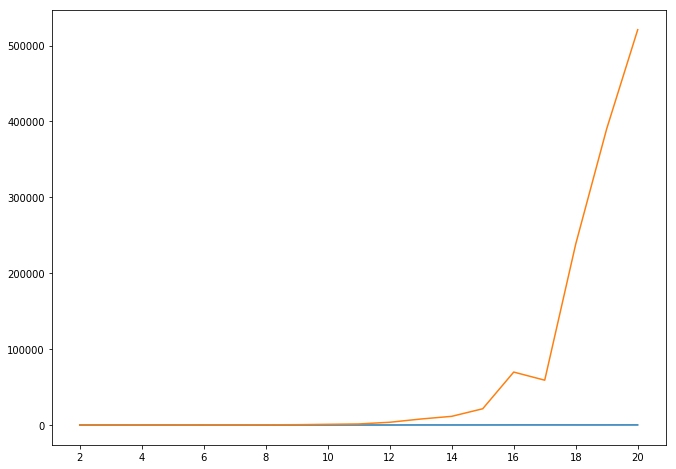

In [7]:
import random as rnd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np


def rand_items(n):
    items = []
    for i in range(0, n):
        items.append((rnd.randint(1, 100), rnd.randint(1, 100)))
    return items


calls_with_memo = []
calls_without_memo = []

for i in range(2, 21):
    calls1 = 0
    calls2 = 0
    
    for j in range(0, 5):
        K = 20 * i
        items = rand_items(i)
        n = len(items) - 1
        global weights
        weights = []
        global values
        values = []
        global calls
        calls = 0
        for item in items:
            weights.append(item[0])
            values.append(item[1])
        value_memo(n, K)
        calls1 += calls
        calls = 0
        value(n, K)
        calls2 += calls
        calls = 0
    calls_with_memo.append(calls1 / 5)
    calls_without_memo.append(calls2 / 5)
    
   
   
x = np.arange(2, 21)
y1 = np.asarray(calls_with_memo)
y2 = np.asarray(calls_without_memo)
    
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(x, y1)
ax1.plot(x, y2)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

## Bellman-Ford

Dynamic Programming kann auch für das 'Single-Source Shortest Path Problem' genutzt werden. Dabei geht es darum den kürzesten Weg von einer Quelle zu einem anderen Knoten in einem Graph zu finden. Der Bellman-Ford-Algorithmus wurde in den Jahren 1956-1958 von Richard Bellman, Lester Ford und Edward F. Moore veröffentlicht. Heute wird dieser Algorithmus beispielsweise im Routing von Netzwerken eingesetzt.

Da es sich um Dynamic Programming handelt, stellt sich die Frage, was die Subprobleme sind. Angenommen man hat einen Pfad von $v$ nach $u$ mit $v, w_0, w_1,..., w_{k-1}, w_k = u$, so ist offensichtlich, dass $v, w_0, w_1, ..., w_{k-1}$ der kürzeste Pfad zu $w_{k-1}$ ist. So folgt, dass das Subproblem der kürzeste Weg zu einem der benachbarten Knoten ist, unter der Nutzung von einer Kante weniger.

__*Beweis.*__ Nehmen wir an, dass $w_0,...,w_{k-1}$ nicht der kürzeste Weg zwischen $w_0$ und $w_{k-1}$ ist, so gibt es einen Pfad $w_0,w'_1,...,w'_j,w_{k-1}$ mit einer kürzeren Länge. Dadurch hat auch $w_0,w'_1,...,w'_j,w_{k-1},w_k$ eine kürzer Länge als $w_0,...,w_{k-1},w_k$. Dies widerspricht jedoch der Bedingung, dass $w_0,...,w_{k-1},w_k$ der kürzeste Pfad von $w_0$ nach $w_k$ ist.
<div style="text-align: right; font-size: 24px;">&#9633;</div>

Durch diese Erkenntnis lässt sich folgende rekursive Gleichung aufstellen. $v$ ist der Knoten, zu dem der kürzeste Pfad gefunden werden soll, $v.adj$ sind die Elemente der Adjazenz-Liste von $v$, $s$ ist der Startknoten und $k$ ist die Anzahl der maximal zu benutzenden Kanten:

$$bf(v,k)=\begin{cases}
    0, & \text{wenn $v=s$}.\\
    \infty, & \text{wenn $v \neq s \land k=0$}.\\
    \underset{u \in v.adj}{\text{min}}(dis(u, v) + bf(u, k-1)), & \text{sonst}.
  \end{cases}$$
  
Handelt es sich bei $v$ um den Startknoten $s$, so sind die Kosten um zu $v$ zu gelangen 0. Beträgt die Anzahl der maximal zu benutzenden Kanten 0 und handelt es sich bei $v$ nicht um $s$, so ist $v$ nicht erreichbar und die Funktion gibt $\infty$ zurück. Ansonsten ergibt sich die Lösung aus der kleinsten Summe aus dem Gewicht zu einem der benachbarten Knoten und dem kürzesten Weg dieses benachbarten Knoten unter der Verwendung von $k-1$ Kanten.
</div>

In [8]:
class Node:
    def __init__(self, id):
        self.id = id
        self.adj = {}

    def add(self, node, weight):
        self.adj[node] = weight


def bellman_ford(v, k):
    if v == source:
        return 0
    if k == 0:
        return float('inf')
    min_dis = float('inf')
    for u, w in v.adj.items():
        dis = w + bellman_ford(u, k-1)
        if dis < min_dis:
            min_dis = dis
    return min_dis

a = Node('a')
b = Node('b')
c = Node('c')
d = Node('d')
e = Node('e')

a.add(b, -1)
a.add(c, 4)
b.add(c, 3)
b.add(d, 2)
b.add(e, 2)
d.add(b, 1)
d.add(c, 5)
e.add(d, -3)


source = d
print(bellman_ford(a, 5))

-2


In [9]:
#memoize decorator
def memoize_bf(f):
    memo = {}
    
    def helper(v, k):
        if (v, k) not in memo:
            memo[(v, k)] = f(v, k)
        return memo[(v, k)]
    
    return helper


@memoize_bf
def bellman_ford_memo(v, k):
    if v == source:
        return 0
    if k == 0:
        return float('inf')
    min_dis = float('inf')
    for u, w in v.adj.items():
        dis = w + bellman_ford_memo(u, k-1)
        if dis < min_dis:
            min_dis = dis
    return min_dis

print(bellman_ford_memo(a, 5))

-2


### Bottom Up

Auch für den Bellman-Ford Algorithmus lässt sich ein Bottom Up-Ansatz definieren. Dabei wird zunächst der Startknoten mit der Distanz 0 initialisiert und alle anderen Knoten mit der Distanz $\infty$ initialisiert. $\infty$ dient dabei quasi als Platzhalter und steht für "nicht erreichbar". Danach werden alle Kanten $(u, v) \in E$ durchiteriert und ein Wert für die Distanz zum Knoten $v$ zugewiesen. Dieser Wert ist entweder die Summe aus der bisherig gefundenen Distanz zu $u$ und dem Gewicht (der Distanz) zwischen $u$ und $v$ oder dem bisherigen Wert für die Distanz zu $v$. Dabei wird das Minimum, also der kleinere der beiden Werte, genommen, da der kürzeste Weg gefunden werden soll. Dieser Vorgang wird $\lvert V \rvert - 1$ mal wiederholt, da der kürzeste Weg zwischen zwei Knoten maximal über $\lvert V \rvert - 1$ Knoten geht, da er sonst mehrfach durch den gleichen Knoten gehen würde und es sich somit um einen Kreis innerhalb des Weges handelt, welcher nicht der kürzeste Weg sein kann. Sollte sich herausstellen, dass für $\lvert V \rvert$ Iterationen sich kürzere Wege ergeben als nach $\lvert V \rvert - 1$ Iterationen, so muss es einen negativen Kreis (negative weight cycle) innerhalb des Graphen geben. Adernfalls wurden die kürzesten Wege ausgehend vom Startknoten gefunden und es existiert kein negativer Kreis im Graphen.

Für die Implementation dieser Variante des Bellman-Ford Algorithmus wird nicht die oben definierte Datenstruktur Node, sondern eine Liste aller Knoten (identifiziert als String) und eine Liste aller Kanten genutzt.

In [10]:
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight

        
def bellman_ford_bottom_up(nodes, edges, source):
    dis = {}
    #initializing distances
    for node in nodes:
        if node == source:
            dis[node] = (0, source)
        else:
            dis[node] = (float('inf'), None)

    for i in range(len(nodes) - 1):
        for edge in edges:
            if (dis[edge.u][0] + edge.weight < dis[edge.v][0]):
                dis[edge.v] = (dis[edge.u][0] + edge.weight, edge.u)
    
    for edge in edges:
        if (dis[edge.u][0] + edge.weight < dis[edge.v][0]):
            return None #there is a negative weight cycle
    return dis #otherwise return (distance, previous node)-dictionary


nodes = ['a', 'b', 'c', 'd', 'e']
edges = [Edge('b', 'a', -1), Edge('c', 'a', 4), Edge('c', 'b', 3), Edge('d', 'b', 2), Edge('e', 'b', 2), 
         Edge('b', 'd', 1), Edge('c', 'd', 5), Edge('d', 'e', -3)]

print(bellman_ford_bottom_up(nodes, edges, 'd'))

{'a': (-2, 'b'), 'b': (-1, 'e'), 'c': (inf, None), 'd': (0, 'd'), 'e': (-3, 'd')}


Dieser Ausgabe lässt sich entnehmen, dass der kürzeste Weg von a nach d das Gewicht -2 hat.

Durch die zwei Schleifen ist ersichtlich, dass der Bellman-Ford Algorithmus eine Laufzeit von $\mathcal{O}(\lvert V \rvert \cdot \lvert E \rvert)$. Damit ist er ineffizienter als vergleichbare Algorithmen, wie der Dijkstra Algorithmus, jedoch hat Bellman-Ford den Vorteil, dass er mit negativen Gewichten der Kanten umgehen kann und das korrekte Ergebnis liefert.

## Geldwechsel-Problem

Beim Geldwechsel-Problem ist die Anzahl der möglichen Münzkombinationen, die den gewünschten Betrag bilden, gefragt. Dabei ist eine Liste aller verfügbaren (positiven) Münzprägungen (1ct, 2ct, 5ct, 10ct, ...) gegeben. Es wird angenommen, dass alle Münzwerte unendlich oft zur Verfügung stehen.

Der Dynamic Programming-Ansatz um dieses Problem zu lösen, bildet sich folgendermaßen:
Angenommen, man möchte 54ct wechseln und die verfügbaren Münzprägungen sind: 20ct, 10ct, 5ct und 2ct. Nun betrachten wir nur die erste dieser vier Münzprägungen, nämlich 20ct. Zunächst könnte man sich entscheiden, kein 20ct-Stück zu benutzen und lediglich die folgenden Münzstücke zu verwenden. Man könnte sich auch entscheiden, genau ein 20ct-Stück zu verwenden. In diesem Fall müssen mit den restlichen Münzen nur noch 34ct gewechselt werden. Genauso könnten 2 20ct-Stücke verwendet werden und entsprechend 14ct mit den restlichen Münzen gebildet werden. Die Möglichkeit 3 20ct-Stücke zu verwenden steht nicht zur Verfügung, da dies bereits die 54ct überschreiten würde. Sei $N$ der zu wechselnde Betrag und $k$ der Wert der zu untersuchenden Münze, so kann die Münze 0 bis $n = \lfloor \frac{N}{k} \rfloor$ mal verwendet werden. 

__Hinweis__ $f: \mathbb{R} \to \mathbb{Z}$ mit $f(x) = \lfloor x \rfloor$ beschreibt die *floor*-Funktion, bei der die Zahl auf die nächst kleinere ganze Zahl abgerundet wird.

Jetzt müssen für die rekursive Definition noch die Elementarfälle gebildet werden. Beträgt der zu wechselnde Betrag $N = 0$, so gibt es genau eine Möglichkeit, diesen Betrag zu bilden, nämlich indem man keine Münze verwendet. Ist der zu wechselnde Betrag $N$ negativ, so gibt es keine Möglichkeit diesen Betrag zu bilden, da alle Münzen einen positiven Wert haben.

In [11]:
import pandas as pd

dic = {}

coins = [1, 2, 5, 10, 20, 50]


def coin_change(N, i):
    if N == 0:
        return 1
    if N < 0 or i >= len(coins):
        return 0
    if (N, i) in dic:
        return dic[N, i]
    ways = 0
    while N >= 0:
        ways += coin_change(N, i+1)
        N -= coins[i]
    dic[N, i] = ways
    return ways


print(pd.DataFrame({'N': list(range(21)), 'coin change ways': list(map(lambda n: coin_change(n, 0), list(range(21))))})
      .to_string(index=False))

N  coin change ways
 0                 1
 1                 1
 2                 2
 3                 2
 4                 3
 5                 4
 6                 5
 7                 6
 8                 7
 9                 8
10                11
11                12
12                15
13                16
14                19
15                22
16                25
17                28
18                31
19                34
20                41
